In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_test.shape

(418, 11)

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)


In [8]:
df['Embarked'].fillna('S',inplace = True)
df_test['Embarked'].fillna('S',inplace = True)

In [9]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [10]:
df = df.drop('Cabin', axis = 1)
df_test = df_test.drop('Cabin', axis = 1)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df_tst = pd.read_csv('gender_submission.csv')
df_test = pd.merge(df_test, df_tst, on='PassengerId', how='outer')

In [14]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [15]:
df = df.drop(['Name','Ticket'], axis =1)
df_test = df_test.drop(['Name','Ticket'], axis =1)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1


In [18]:
X_train = df.drop('Survived', axis = 1)
y_train = df['Survived']

In [19]:
X_test = df_test.drop('Survived', axis = 1)
y_test = df_test['Survived']

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
X_train['Sex'] = labelencoder1.fit_transform(X_train['Sex'])

labelencoder2 = LabelEncoder()
X_test['Sex'] = labelencoder2.fit_transform(X_test['Sex'])

labelencoder3 = LabelEncoder()
X_train['Embarked'] = labelencoder3.fit_transform(X_train['Embarked'])

labelencoder4 = LabelEncoder()
X_test['Embarked'] = labelencoder4.fit_transform(X_test['Embarked'])


In [71]:
random_forest = RandomForestClassifier(criterion='gini', n_estimators=100,random_state=0, min_samples_leaf=6, min_samples_split=2, max_depth=4, max_features='log2',)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=6,
                       random_state=0)

In [72]:
y_pred = random_forest.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9210526315789473


<Axes: >

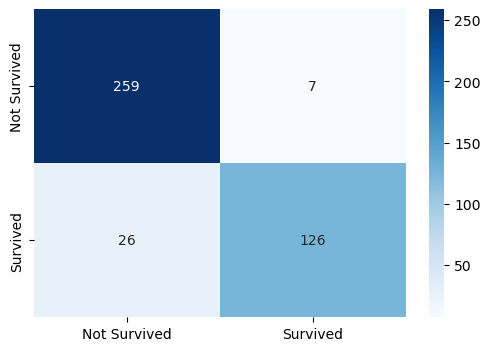

In [74]:
cm = confusion_matrix(y_test,y_pred)
class_labels = ['Not Survived','Survived']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)